INF2178 Assignment 4\
Yuanyuan Pan\
1003980150

# MRI Longitudinal Study of Dementia Analysis

Motivated by the interest to understand the progression of dementia and potential factors influencing brain volume alterations, this study seeks to explore whether differences in brain volume alterations exist between gender and among different dementia status groups across several visits. By considering the span of visit times as a within-subject factor and gender and dementia status as between-subject factors, the study employs statistical techniques, including the exploratory data analysis (EDA) and mixed-effect ANOVA to gain insights into how gender and dementia status affect the trajectory of nWBV changes over multiple visits.


In [5]:
# Run this chunk to upload the input data file
from google.colab import files
files_upload = files.upload()

Saving INF2178_A4_data.csv to INF2178_A4_data.csv


In [58]:
# import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
!pip install pingouin
import pingouin as pg

## Data Pre-Processing and Cleaning

In [59]:
# read data into dataframe and take a glimpse of the data
MRIDF = pd.read_csv('INF2178_A4_data.csv')
MRIDF.head()

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


In [60]:
# list of columns that will be used in later analysis
cols_to_use = ['Subject ID', 'Group', 'Visit',
               'M/F','nWBV']
# slicing relevant columns and assigned to new data frame
MRIdf = MRIDF[cols_to_use]

# Apply the mapping to the 'Visit' column
visit_mapping = {1: 'first', 2: 'second'}
MRIdf['Visit'] = MRIdf['Visit'].map(visit_mapping)
# rename M/F column as Gender
MRIdf = MRIdf.rename(columns={'M/F': 'Gender'})

# take a glimpse of the new data
MRIdf.head()

<ipython-input-60-c3f9dae8180b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MRIdf['Visit'] = MRIdf['Visit'].map(visit_mapping)


,Subject ID,Group,Visit,Gender,nWBV
0,OAS2_0001,Nondemented,first,M,0.696
1,OAS2_0001,Nondemented,second,M,0.681
2,OAS2_0002,Demented,first,M,0.736
3,OAS2_0002,Demented,second,M,0.713
4,OAS2_0004,Nondemented,first,F,0.710


## Exploratory Data Analysis (EDA)

In [61]:
MRIdf.groupby(['Visit', 'Group'])['nWBV'].agg(['mean', 'median', 'std']).round(2)

mean  median   std
Visit  Group                          
first  Converted    0.74    0.73  0.03
       Demented     0.72    0.73  0.03
       Nondemented  0.75    0.75  0.04
second Converted    0.73    0.72  0.04
       Demented     0.71    0.71  0.03
       Nondemented  0.74    0.74  0.04

Above table records the summary statistics of nWBN, categorized by different dementia status groups and visits. By examining the statistics, the nWBV tends to slightly decrease from the first to second visit in general, indicating a decrease in brian health. Among all the groups, demented subjects tend to have a relatively more pronounced decreasing trend. By standard deviation, the spread of nWBV values within each group shows a small variability.


In [62]:
MRIdf.groupby(['Visit', 'Gender'])['nWBV'].agg(['mean', 'median', 'std']).round(2)

mean  median   std
Visit  Gender                    
first  F       0.74    0.75  0.04
       M       0.73    0.73  0.04
second F       0.73    0.74  0.04
       M       0.72    0.71  0.04

Above table records the statistics of nWBN, categorized by gender and visits. By examining the statistics, the nWBV tends to slightly decrease from the first to second visit regardless of the gender, also indicating a decrease in brian health. In general, females tend to have a higher value in nWBN compared to males, nevertheless. The standard deviation remained the same, meaning the spread of nWBV values within each gender group have similar variability.


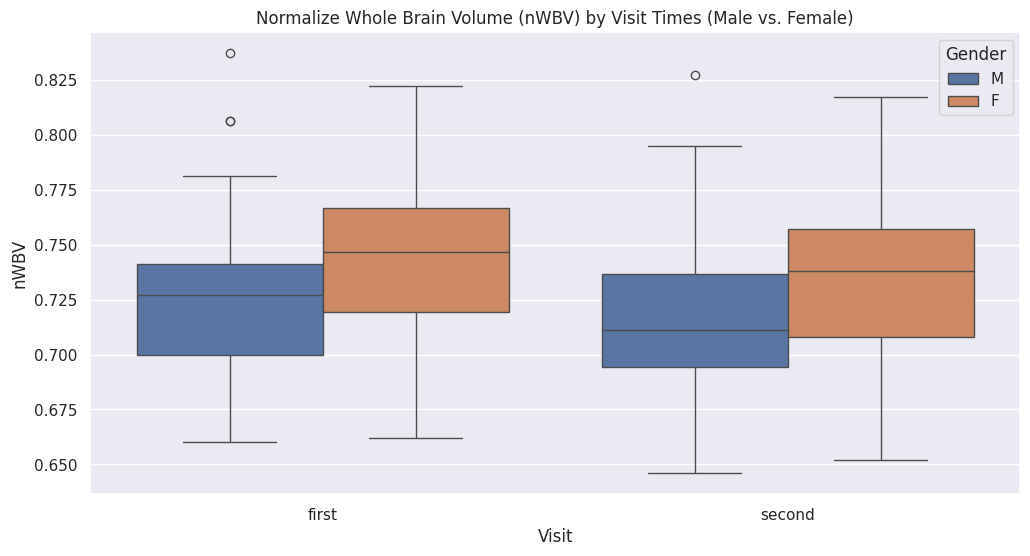

In [63]:
# Create the combined boxplot,
## comparing Normalize Whole Brain Volume (nWBV) vs. Visit Times by Gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=MRIdf, x='Visit',
            y='nWBV',
            hue='Gender')
plt.title('Normalize Whole Brain Volume (nWBV) by Visit Times (Male vs. Female)')
plt.xlabel('Visit')
plt.ylabel('nWBV')
plt.show()

<ipython-input-64-69a46b2b65b0>:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=MRIdf, x='Visit', y='nWBV', hue='Gender', dodge=True,


<Axes: xlabel='Visit', ylabel='nWBV'>

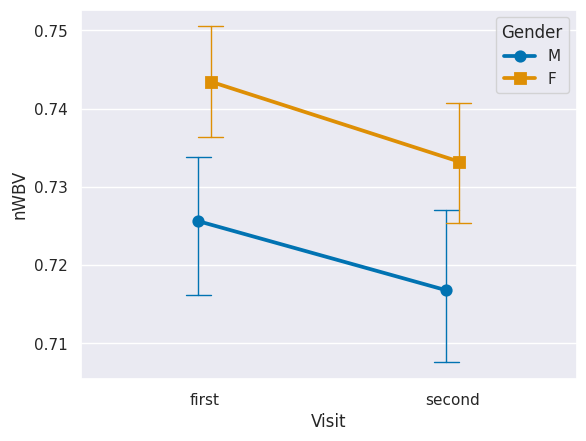

In [64]:
# scatter plot with line segments for Visit vs. nWBV by Gender
sns.set()
sns.pointplot(data=MRIdf, x='Visit', y='nWBV', hue='Gender', dodge=True,
              markers=['o', 's'], capsize=.1, errwidth=1, palette='colorblind')

The above pair of box plot and point plot is the nWBV by different genders across visit times. By examining the box plot and the trend on the point plot, regardless of the gender, there is a clear decline on nWBV from first to second visit. Female subjects tend to have a higher nWBV than male in general, indicating a better brian function health; outliers with higher nWBV exist in male subjects, which means nWBV distribution in male subjects have a relatively larger variability. The spread of the middle 50% data seems to be identical regardless of the gender and visit times. The nWBV of Female subjects are normally distributed while male subjects are slightly right skewed.


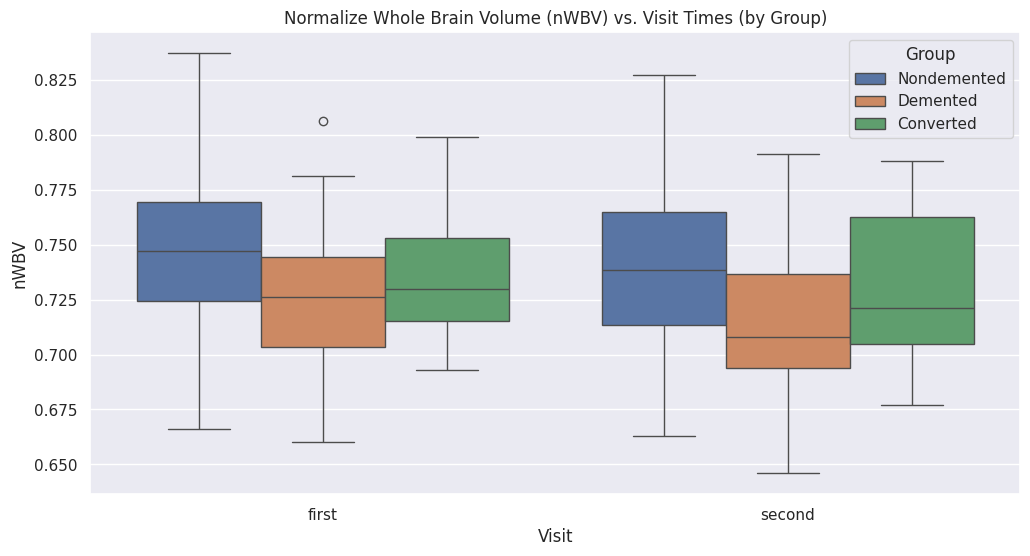

In [65]:
# Create the combined boxplot,
## comparing Normalize Whole Brain Volume (nWBV) vs. Visit Times by Group
plt.figure(figsize=(12, 6))
sns.boxplot(data=MRIdf, x='Visit',
            y='nWBV',
            hue='Group')
plt.title('Normalize Whole Brain Volume (nWBV) vs. Visit Times (by Group)')
plt.xlabel('Visit')
plt.ylabel('nWBV')
plt.show()

<ipython-input-66-6eb9f0e0bbe8>:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=MRIdf, x='Visit', y='nWBV', hue='Group', dodge=True,


<Axes: xlabel='Visit', ylabel='nWBV'>

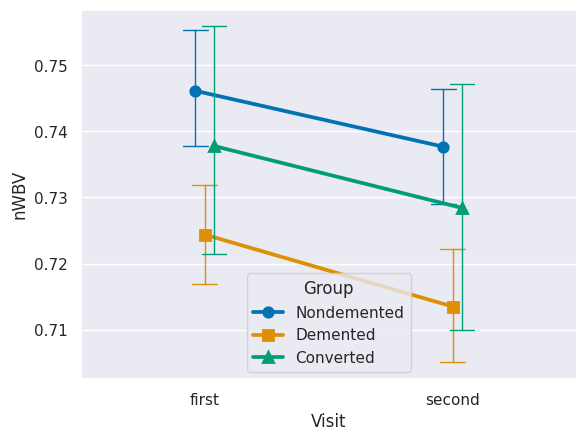

In [66]:
# scatter plot with line segments for Visit vs. nWBV by Group
sns.set()
sns.pointplot(data=MRIdf, x='Visit', y='nWBV', hue='Group', dodge=True,
              markers=['o', 's', '^'], capsize=.1,
              errwidth=1, palette='colorblind')

The above pair of box plot and point plot is the nWBV by different dementia status groups across visit times. By examining the box plot and the trend on the point plot, regardless of the group, there is also a clear decline on nWBV from first to second visit, indicating a decrease in brain health. Focusing on the point plot, the converted group tends to have a larger confidence interval, indicating a higher level of uncertainty and variability in the estimated parameter. According to the boxplot, the middle 50% data did not have obvious change for the nondemented and demented group from first to the second visit, however, the converted group shows a pronounced increase in its middle 50% data spread. Moreover, the lower the nWBV, the higher the chance a subject is diagnosed with dementia.


## Mixed-Effect ANOVA (Two way)

1. Within-subject factor: Visit\
   Between-subject factor: Gender\
   dependent variable: nWBV (Normalize Whole Brain Volume)

Null Hypothesis (H0): \
There is no significant difference in mean nWBV across different visits. \
There is no significant difference in mean nWBV between different genders. \
There is no significant interaction effect between visits and gender on mean nWBV.\
Alternative Hypothesis (H1): \
There is a significant difference in mean nWBV across different visits. \
There is a significant difference in mean nWBV between different genders. \
There is a significant interaction effect between visits and gender on mean nWBV.\


In [67]:
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='nWBV', within='Visit', between='Gender',
                     subject='Subject ID', data=MRIdf)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
Gender       0.021      1    142  0.021   8.030    0.005  0.054  nan
Visit        0.007      1    142  0.007  93.305    0.000  0.397    1.000
Interaction  0.000      1    142  0.000   0.621    0.432  0.004  nan



In [68]:
# conducting post hoc tests showing paired results
posthocs = pg.pairwise_ttests(dv='nWBV', within='Visit', between='Gender',
                     subject='Subject ID', data=MRIdf)
pg.print_table(posthocs)


POST HOC TESTS

Contrast        Visit    A      B       Paired    Parametric        T      dof  alternative      p-unc                 BF10    hedges
--------------  -------  -----  ------  --------  ------------  -----  -------  -------------  -------  -------------------  --------
Visit           -        first  second  True      True          9.672  143.000  two-sided        0.000  225800000000000.000     0.255
Gender          -        F      M       False     True          2.821  122.930  two-sided        0.006                6.506     0.478
Visit * Gender  first    F      M       False     True          2.974  124.056  two-sided        0.004                9.607     0.502
Visit * Gender  second   F      M       False     True          2.608  122.876  two-sided        0.010                3.902     0.442



/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


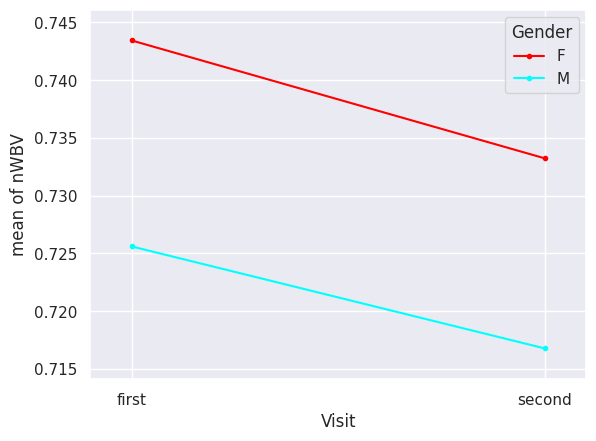

In [69]:
# import relevant oackages
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

# plot interaction plot
fig = interaction_plot(x=MRIdf['Visit'],trace=MRIdf['Gender'],
                       response=MRIdf['nWBV'])
plt.show()

There is a significant difference in mean nWBV between genders since the p-value, 0.005, is less than the significance level. The within-subject factor, visit, shows a high statistical significance on its effect since the p-value is less than 0.001, suggesting a significant difference in mean nWBV across different visits.The interaction effect between gender and visit is not statistically significant since the p-value is much higher than the significance level.

2. Within-subject factor: Visit\
   Between-subject factor: Group\
   dependent variable: nWBV (Normalize Whole Brain Volume)

Null Hypothesis (H0): \
There is no significant difference in mean nWBV across different visits. \
There is no significant difference in mean nWBV among different dementia status groups. \
There is no significant interaction effect between visits and dementia status groups on mean nWBV.\
Alternative Hypothesis (H1): \
There is a significant difference in mean nWBV across different visits. \
There is a significant difference in mean nWBV among different dementia status groups.\
There is a significant interaction effect between visits and dementia status groups on mean nWBV.



In [70]:
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='nWBV', within='Visit', between='Group',
                     subject='Subject ID', data=MRIdf)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
Group        0.034      2    141  0.017   6.712    0.002  0.087  nan
Visit        0.007      1    141  0.007  94.251    0.000  0.401    1.000
Interaction  0.000      2    141  0.000   1.534    0.219  0.021  nan



In [71]:
# conducting post hoc tests showing paired results
posthocs = pg.pairwise_ttests(dv='nWBV', within='Visit', between='Group',
                     subject='Subject ID', data=MRIdf)
pg.print_table(posthocs)


POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc                 BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  -------------------  --------
Visit          -        first      second       True      True           9.672  143.000  two-sided        0.000  225800000000000.000     0.255
Group          -        Converted  Demented     False     True           1.401   14.676  two-sided        0.182                0.668     0.469
Group          -        Converted  Nondemented  False     True          -0.648   15.832  two-sided        0.527                0.361    -0.188
Group          -        Demented   Nondemented  False     True          -3.690  129.436  two-sided        0.000               75.094    -0.633
Visit * Group  first    Converted  Demented     False     True           1.444   14.626  two-sided        0.170              

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


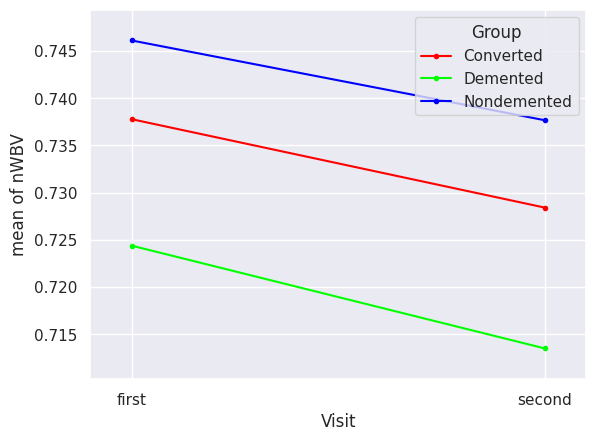

In [72]:
# import relevant oackages
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

# plot interaction plot
fig = interaction_plot(x=MRIdf['Visit'],trace=MRIdf['Group'],
                       response=MRIdf['nWBV'])
plt.show()

There is a significant difference in mean nWBV among different dementia status groups  since the p-value, 0.002, is less than the significance level. The within-subject factor, visit, also shows a high statistical significance on its effect since the p-value is less than 0.001, which is identical to the first ANOVA test. The interaction effect between gender and visit is not statistically significant since the p-value is much higher than the significance level.


### Assumption Check

In [73]:
#checking assumptions (within-subject)
#mauchly's test of spericity
pg.sphericity(data=MRIdf, dv='nWBV', subject='Subject ID',
              within='Visit')[-1]

1.0

The p-value associated with the test result is 1.0, indicating a failure to reject the null hypothesis, which means we do not have evidence to suggest that the assumption of sphericity is violated. Hence the data meet the assumption of sphericity.


In [74]:
#test of normality
pg.normality(data=MRIdf, dv='nWBV', group='Visit')

,W,pval,normal
Visit,,,
first,0.990075,0.372060,True
second,0.989654,0.366703,True


Both p-values are much greater than the significance level, suggesting we do not have sufficient evidence to reject the null hypothesis of normality for both visits. Hence the normality assumption was met as well.


## Statistical Power Analysis

In [75]:
# statistical power for t-tests
# import required modules
from math import sqrt
from statsmodels.stats.power import TTestIndPower

# perform power analysis to find sample size
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=0.7, alpha=0.05, power=0.91,
					ratio=1, alternative='two-sided')
# round up from estimated sample size
sampleSize = np.int64(np.ceil(n))

print('Sample size/Number needed in each group: {:.3f}'.format(sampleSize))

Sample size/Number needed in each group: 46.000


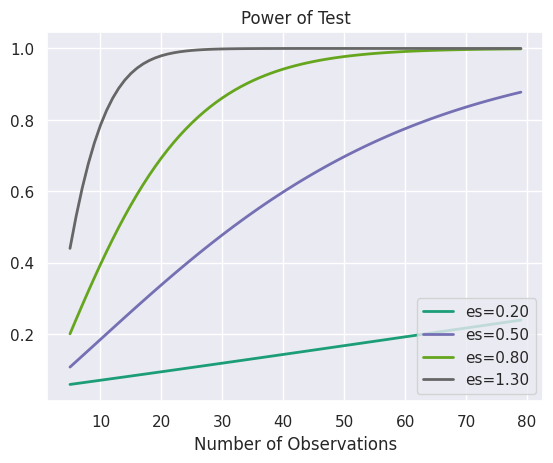

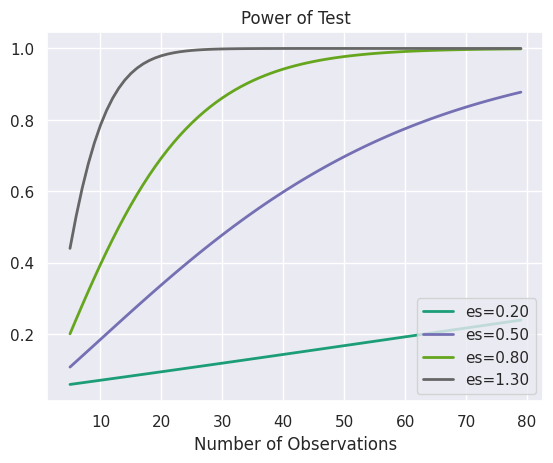

In [76]:
# power analysis varying parameters
effect_sizes = np.array([0.2, 0.5, 0.8, 1.3])
sample_sizes = np.array(range(5, 80))

# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
			effect_size=effect_sizes)